Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

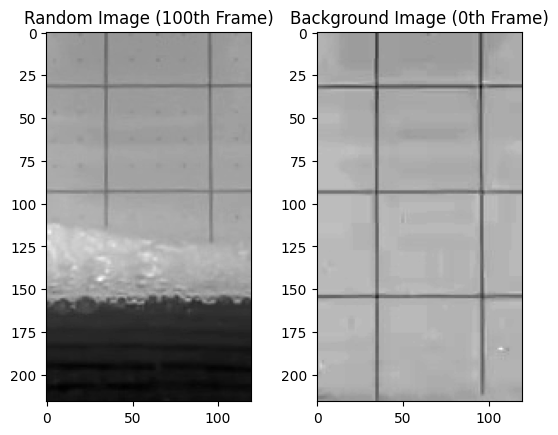

In [2]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Total Area: 25920
Percentage: 26.3 %


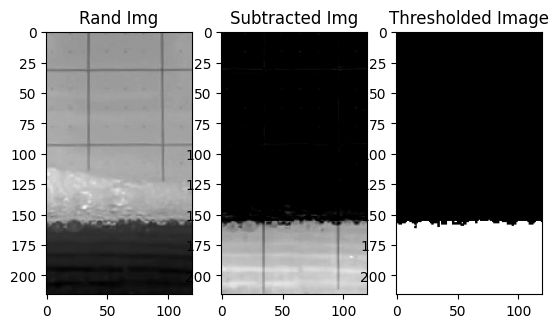

In [3]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

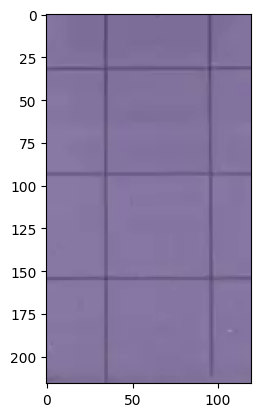

In [4]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



# **Answers**

**Visual Measurement of Liquid Level**

1. Plot of the liquid level.

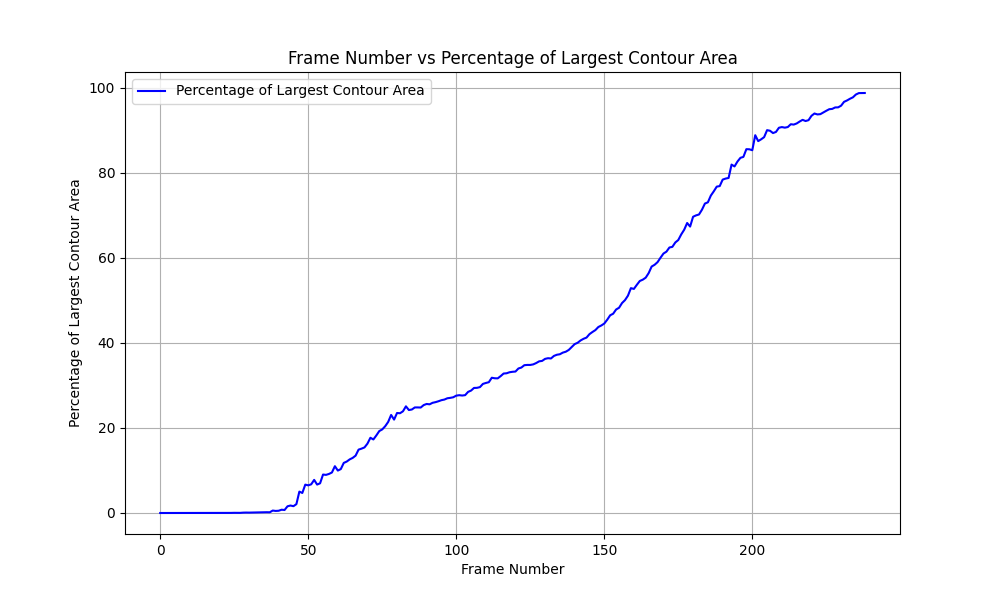

2. A brief note on what the student understood by reading the section on Otsu's threholding method.

Otsu's thresholding method is a powerful technique in image processing that automates the selection of an optimal threshold for converting grayscale images into binary images. The method operates by analyzing the intensity histogram of the image and maximizing the between-class variance, which helps distinguish foreground from background. By calculating the variance of pixel intensities within and between classes, Otsu’s method identifies the threshold that minimizes intra-class variance while maximizing inter-class variance. This approach is particularly effective for images with bimodal histograms, making it widely used in applications such as object detection, segmentation, and image analysis, enhancing overall image quality.

3.  2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.

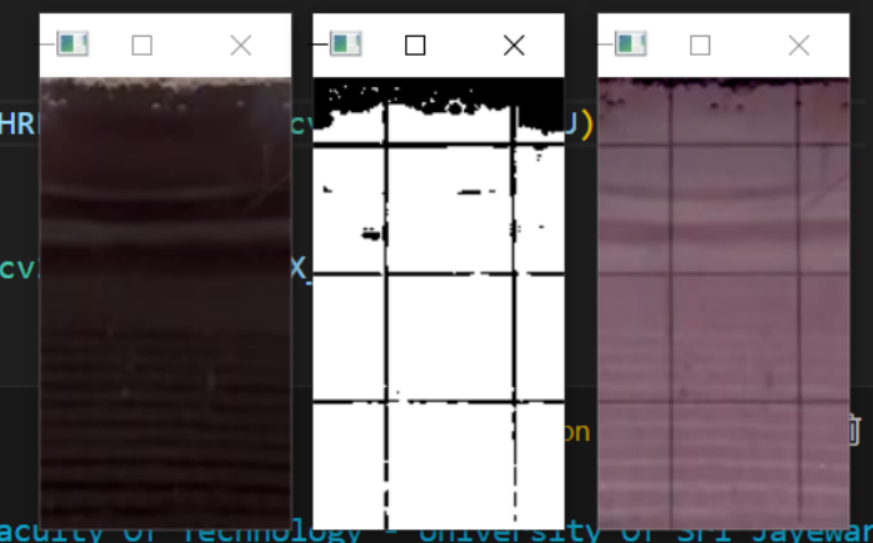

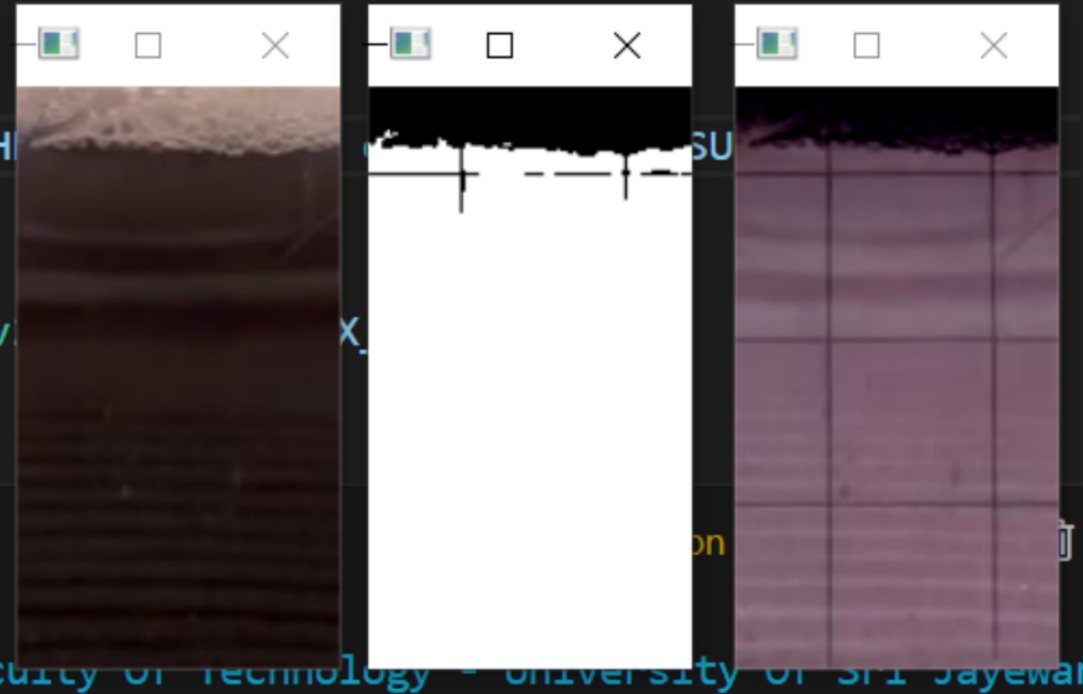

4. A brief description on the final algorithm developed by the student.

The provided code implements a video processing algorithm using OpenCV and Matplotlib to analyze changes in a video by comparing each frame to a static background. The primary goal is to detect and quantify the largest moving object in the video by calculating its area as a percentage of the total frame area.

Key Steps in the Algorithm

1.	Video Capture:

•	The algorithm begins by opening a video file using OpenCV's VideoCapture. If the video cannot be opened, an error message is displayed.

2.	Background Initialization:

•	The first frame of the video is read and stored as the background.

3.	Frame Processing Loop:

•	The algorithm enters a loop where it continuously reads frames from the video until there are no more frames to process.

•	Background Subtraction
•	Grayscale Conversion
•	Thresholding
•	Contour Detection

4.	Area Calculation:

•	The algorithm calculates the area of the largest contour found in each frame. If contours are detected, it computes the area as a percentage of the total frame area, which provides a measure of how much of the frame is occupied by moving objects.

5.	Visualization:

•	Each processed frame (original, subtracted, and thresholded) is displayed in separate windows.

6.	Data Collection and Plotting:

•	Throughout the processing, the percentage of the largest contour area is collected for each frame.

•	After processing all frames, a line plot is generated using Matplotlib to visualize how the percentage of moving objects changes over time.


In [ ]:
import cv2
import matplotlib.pyplot as plt

def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return

    frame_no = 0
    percentages = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Subtract the current frame from the background
        img_sub = cv2.subtract(background, frame)

        # Convert to grayscale
        img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

        # Apply threshold (Binary)
        #ret, img_sub_thresh = cv2.threshold(img_sub_gray, 100, 255, cv2.THRESH_BINARY)

        # Apply threshold (Otsu)
        ret, img_sub_thresh = cv2.threshold(img_sub_gray, 80, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, ret = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the largest contour area percentage
        if contours:
            largest_contour_area = max(cv2.contourArea(c) for c in contours)
            frame_area = frame.shape[0] * frame.shape[1]
            percentage = (largest_contour_area / frame_area) * 100
        else:
            percentage = 0

        percentages.append(percentage)

        # Display the video and processed frames
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Subtracted Frame', img_sub)
        cv2.imshow('Thresholded Frame', img_sub_thresh)

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_no += 1

    cap.release()
    cv2.destroyAllWindows()

    # Plot Frame Number vs Percentage graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(percentages)), percentages, label="Percentage of Largest Contour Area", color="blue")
    plt.xlabel('Frame Number')
    plt.ylabel('Percentage of Largest Contour Area')
    plt.title('Frame Number vs Percentage of Largest Contour Area')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function with the video path
video_path = 'demo2_images/liquidVideo.mp4'
process_video(video_path)